## Description :

## Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

## Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc

### As per the description and variables, this is the classifier problem. So I am going to use the following Algorithms to predict the target values and will choose the best Algorithm from among them.

1. KNN Algorithm
2. Naive Bayes Algorithm
3. Logistic Regression
4. Random Forest

### Import built-in libraries

In [273]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Reading train, test and sample submission files using pandas function

In [4]:
os.chdir(r"C:\Users\kalya\Santhosh\Data Science\Notebook\Preprocessing")

In [68]:
train = pd.read_csv('Vehicle_train.csv')

In [69]:
test = pd.read_csv('Vehicle_test.csv')

In [70]:
sample_submission = pd.read_csv('Vehicle_sample_submission.csv')

In [11]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [13]:
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


### Initial Analysis on Data

In [15]:
display(train.shape, test.shape, sample_submission.shape)

(381109, 12)

(127037, 11)

(127037, 2)

In [19]:
display(train.isna().sum(), test.isna().sum(), sample_submission.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

id          0
Response    0
dtype: int64

In [21]:
display(train.describe().T, test.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


,count,mean,std,min,25%,50%,75%,max
id,127037.0,444628.000000,36672.567411,381110.0,412869.0,444628.0,476387.0,508146.0
Age,127037.0,38.765903,15.465814,20.0,25.0,36.0,49.0,85.0
Driving_License,127037.0,0.998134,0.043152,0.0,1.0,1.0,1.0,1.0
Region_Code,127037.0,26.459866,13.209916,0.0,15.0,28.0,35.0,52.0
Previously_Insured,127037.0,0.460039,0.498403,0.0,0.0,0.0,1.0,1.0
Annual_Premium,127037.0,30524.643576,16945.297103,2630.0,24325.0,31642.0,39408.0,472042.0
Policy_Sales_Channel,127037.0,111.800468,54.371765,1.0,26.0,135.0,152.0,163.0
Vintage,127037.0,154.318301,83.661588,10.0,82.0,154.0,227.0,299.0


In [25]:
display(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 

None

None

In [37]:
train.columns[train.dtypes == 'object']

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [39]:
test.columns[test.dtypes == 'object']

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [41]:
train.select_dtypes(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [42]:
train.select_dtypes(exclude='object')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0


In [45]:
[print(i, train[i].unique()) for i in train.select_dtypes(include='object').columns]

Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


[None, None, None]

In [46]:
[print(i, test[i].unique()) for i in test.select_dtypes(include='object').columns]

Gender ['Male' 'Female']
Vehicle_Age ['< 1 Year' '1-2 Year' '> 2 Years']
Vehicle_Damage ['No' 'Yes']


[None, None, None]

### Combine train and test files for the feature selections and modelling part

In [75]:
train['Source'] = 'train'

In [76]:
test['Source'] = 'test'

In [78]:
display(train.columns, test.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Source'],
      dtype='object')

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Source'],
      dtype='object')

In [79]:
display(train_bkp.columns, test_bkp.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Source'],
      dtype='object')

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Source'],
      dtype='object')

In [80]:
display(train.shape, test.shape)

(381109, 13)

(127037, 12)

In [ ]:
### As per the above result, we can ignore ID column in our modelling part

In [92]:
data = pd.concat([train,test])

In [93]:
data.shape

(508146, 13)

In [94]:
display(data.head(3), data.tail(3))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN,test
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN,test


In [95]:
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
508145,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN,test


In [96]:
data.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
Source                       0
dtype: int64

In [97]:
[print(i, data[i].unique()) for i in data.select_dtypes(include='object').columns]

Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']
Source ['train' 'test']


[None, None, None, None]

### Data manipulations

In [90]:
data['Gender'].replace({'Male' :1, 'Female':0}, inplace = True)

In [98]:
data['Vehicle_Damage'].replace({'Yes' :1, 'No':0}, inplace = True)

In [99]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
Source                   object
dtype: object

In [102]:
data.Annual_Premium.describe().T

count    508146.000000
mean      30554.453041
std       17146.574625
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [115]:
data_Annual_Prem  = data[['id','Annual_Premium']].copy()

In [117]:
data_Annual_Prem.head(3)

,id,Annual_Premium
0,1,40454.0
1,2,33536.0
2,3,38294.0


In [118]:
scale = StandardScaler()
scaled = scale.fit_transform(data_Annual_Prem)

In [120]:
scaled

array([[-1.7320474 ,  0.57734894],
       [-1.73204058,  0.17388604],
       [-1.73203376,  0.45137613],
       ...,
       [ 1.73203376, -0.04388362],
       [ 1.73204058,  1.88495834],
       [ 1.7320474 , -0.15323502]])

In [146]:
data_Annual_Prem = pd.DataFrame(scaled, columns = ['id', 'Annual_Premium_scale'])

In [132]:
data_Annual_Prem.head(3)

,id,Annual_Premium_scale
0,-1.732047,0.577349
1,-1.732041,0.173886
2,-1.732034,0.451376


In [135]:
data['Annual_Premium_scale'] = data_Annual_Prem.Annual_Premium_scale

In [136]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1.0,train,0.577349
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0.0,train,0.173886
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1.0,train,0.451376


In [138]:
data.drop(columns = 'Annual_Premium', inplace = True)

In [139]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale
0,1,Male,44,1,28.0,0,> 2 Years,1,26.0,217,1.0,train,0.577349
1,2,Male,76,1,3.0,0,1-2 Year,0,26.0,183,0.0,train,0.173886
2,3,Male,47,1,28.0,0,> 2 Years,1,26.0,27,1.0,train,0.451376


### Feature Engineering

In [142]:
data_veh_age_one_hot = pd.get_dummies(data['Vehicle_Age'])

In [143]:
data_veh_age_one_hot.head(3)

,1-2 Year,< 1 Year,> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1


In [151]:
data_veh_age_one_hot.columns

Index(['1-2 Year', '< 1 Year', '> 2 Years'], dtype='object')

In [154]:
for i in data_veh_age_one_hot:
    data[i] = data_veh_age_one_hot[i]

In [155]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,Male,44,1,28.0,0,> 2 Years,1,26.0,217,1.0,train,0.577349,0,0,1
1,2,Male,76,1,3.0,0,1-2 Year,0,26.0,183,0.0,train,0.173886,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,1,26.0,27,1.0,train,0.451376,0,0,1


In [156]:
data.drop(columns = 'Vehicle_Age', inplace = True)

In [157]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Source,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,Male,44,1,28.0,0,1,26.0,217,1.0,train,0.577349,0,0,1
1,2,Male,76,1,3.0,0,0,26.0,183,0.0,train,0.173886,1,0,0
2,3,Male,47,1,28.0,0,1,26.0,27,1.0,train,0.451376,0,0,1


In [158]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Damage            int64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
Source                   object
Annual_Premium_scale    float64
1-2 Year                  uint8
< 1 Year                  uint8
> 2 Years                 uint8
dtype: object

In [160]:
data['Gender'].replace({'Male' :1, 'Female':0}, inplace = True)

In [161]:
data.Gender.unique()

array([1, 0], dtype=int64)

In [164]:
data.select_dtypes(exclude=np.number).head(3)

,Source
0,train
1,train
2,train


In [165]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Damage            int64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
Source                   object
Annual_Premium_scale    float64
1-2 Year                  uint8
< 1 Year                  uint8
> 2 Years                 uint8
dtype: object

In [167]:
[print(i, data[i].unique()) for i in data.select_dtypes(exclude='object').columns]

id [     1      2      3 ... 508144 508145 508146]
Gender [1 0]
Age [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License [1 0]
Region_Code [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured [0 1]
Vehicle_Damage [1 0]
Policy_Sales_Channel [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  8

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [168]:
data_preprocessed = data.drop(columns = 'id')

In [170]:
train_preprocessed = data_preprocessed[data_preprocessed['Source']=='train'].drop(columns = 'Source')

In [171]:
test_preprocessed = data_preprocessed[data_preprocessed['Source']=='test'].drop(columns = ['Source','Response'])

In [175]:
train_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,44,1,28.0,0,1,26.0,217,1.0,0.577349,0,0,1
1,1,76,1,3.0,0,0,26.0,183,0.0,0.173886,1,0,0
2,1,47,1,28.0,0,1,26.0,27,1.0,0.451376,0,0,1
3,1,21,1,11.0,1,0,152.0,203,0.0,-0.112877,0,1,0
4,0,29,1,41.0,1,0,152.0,39,0.0,-0.178371,0,1,0


In [174]:
test_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
381109,1,25,1,11.0,1,0,152.0,53,0.305108,0,1,0
381110,1,40,1,28.0,0,1,7.0,111,0.187067,1,0,0
381111,1,47,1,28.0,0,1,124.0,199,0.553787,1,0,0
381112,1,24,1,27.0,1,1,152.0,187,0.396671,0,1,0
381113,1,27,1,28.0,1,0,152.0,297,1.664623,0,1,0


In [176]:
test_preprocessed.reset_index(inplace=True, drop=True)
display(test_preprocessed.head(1), test_preprocessed.tail(1))

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,25,1,11.0,1,0,152.0,53,0.305108,0,1,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
127036,1,41,1,29.0,1,0,124.0,231,-0.153235,1,0,0


In [177]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Source'],
      dtype='object')

In [178]:
train_preprocessed.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Annual_Premium_scale', '1-2 Year', '< 1 Year', '> 2 Years'],
      dtype='object')

## Modelling

### I worked on each Algorithms Seperately.  

### Using KNN Algorithm

In [183]:
X = train_preprocessed.drop(columns = 'Response')

In [184]:
y = train_preprocessed['Response']

In [186]:
train_preprocessed.shape

(381109, 13)

In [185]:
X.shape, y.shape

((381109, 12), (381109,))

In [187]:
train_X, test_X, train_y, test_y = train_test_split(X,y, random_state =32, test_size = 0.2)

100%|██████████| 24/24 [03:03<00:00,  7.66s/it]


([<matplotlib.axis.XTick at 0x22103e232b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

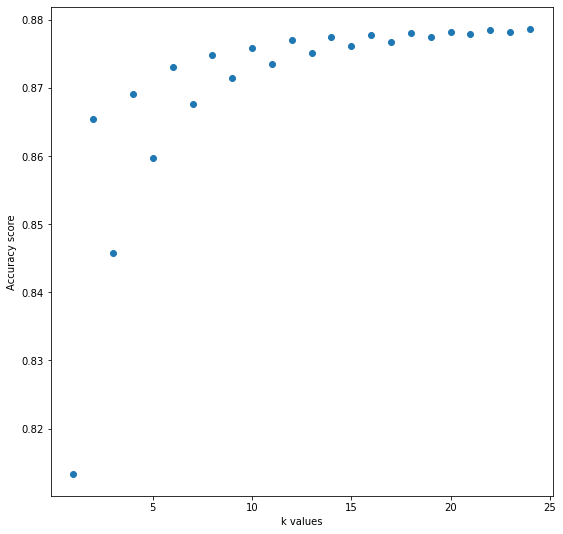

In [195]:
from tqdm import tqdm

k_range = range(1,25)
score = []

for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    score.append(knn.score(test_X, test_y))
    
plt.figure(figsize = (9, 9))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([5, 10, 15, 20, 25])

In [239]:
test_preprocessed.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_scale,1-2 Year,< 1 Year,> 2 Years
0,1,25,1,11.0,1,0,152.0,53,0.305108,0,1,0
1,1,40,1,28.0,0,1,7.0,111,0.187067,1,0,0
2,1,47,1,28.0,0,1,124.0,199,0.553787,1,0,0
3,1,24,1,27.0,1,1,152.0,187,0.396671,0,1,0
4,1,27,1,28.0,1,0,152.0,297,1.664623,0,1,0


In [240]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(train_X, train_y)
knn_train_pred = knn.predict(train_X)
knn_train_score = knn.score(train_X, train_y)
print('knn_train_score :', knn_train_score)
print('knn_train_accuracy_score :', accuracy_score(train_y, knn_train_pred))

knn_test_pred = knn.predict(test_X)
knn_test_score = knn.score(test_X, test_y)
print('knn_test_score :', knn_test_score)
print('knn_test_accuracy_score :', accuracy_score(test_y, knn_test_pred))

knn_orig_test_pred = knn.predict(test_preprocessed)

knn_train_score : 0.8791322686765917
knn_train_accuracy_score : 0.8791322686765917
knn_test_score : 0.8761381228516701
knn_test_accuracy_score : 0.8761381228516701


In [271]:
sample_submission['Response'] = knn_orig_test_pred

sample_submission.to_csv('Vehicle_knn_submission_res.csv',index=False)

### Using Naive Bayes Algorithm to predict the values

In [241]:
nb = GaussianNB()
nb.fit(train_X, train_y)
nb_train_pred = nb.predict(train_X)
nb_train_score = accuracy_score(train_y, nb_train_pred)
print('nb_train_score :', nb_train_score)
print('train Confusion matrix :', confusion_matrix(train_y, nb_train_pred))
print('train Classification report : \n', classification_report(train_y, nb_train_pred))

nb_test_pred = nb.predict(test_X)
nb_test_score = accuracy_score(test_y, nb_test_pred)
print('nb_test_score :', nb_test_score)
print('test Confusion matrix :', confusion_matrix(test_y, nb_test_pred))
print('test Classification report : \n', classification_report(test_y, nb_test_pred))

nb_orig_test_pred = nb.predict(test_preprocessed)

nb_train_score : 0.7187252982252441
train Confusion matrix : [[187420  79981]
 [  5776  31710]]
train Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81    267401
         1.0       0.28      0.85      0.43     37486

    accuracy                           0.72    304887
   macro avg       0.63      0.77      0.62    304887
weighted avg       0.89      0.72      0.77    304887

nb_test_score : 0.7163810973209834
test Confusion matrix : [[46824 20174]
 [ 1444  7780]]
test Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     66998
         1.0       0.28      0.84      0.42      9224

    accuracy                           0.72     76222
   macro avg       0.62      0.77      0.62     76222
weighted avg       0.89      0.72      0.76     76222



In [270]:
sample_submission['Response'] = nb_orig_test_pred

sample_submission.to_csv('Vehicle_NB_submission_res.csv',index=False)

### Using Logistic Regression Algorithm. However this is pure classification problem. But i just tried on Logistic regression algorithm

In [242]:
LR = LogisticRegression(max_iter=500)
LR.fit(train_X, train_y)
print('Coefficient :', LR.coef_)
print('model.intercept_ :', LR.intercept_)

print('\n')
LR_train_pred = LR.predict(train_X)
print('Train Accuracy')
print('accuracy score', accuracy_score(train_y, LR_train_pred))
print('f1 score', f1_score(train_y, LR_train_pred))
print('Confusion matrix \n', confusion_matrix(train_y, LR_train_pred))
print('Classification report : \n', classification_report(train_y, nb_train_pred))

print('\n')
LR_test_pred = LR.predict(test_X)
print('Test Accuracy')
print('accuracy score', accuracy_score(test_y, LR_test_pred))
print('f1 score', f1_score(test_y, LR_test_pred))
print('Confusion matrix \n', confusion_matrix(test_y, LR_test_pred))
print('test Classification report : \n', classification_report(test_y, nb_test_pred))

print('\n')
LR_orig_test_pred = LR.predict(test_preprocessed)

C:\Users\kalya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficient : [[ 8.12752353e-02 -2.73813469e-02 -1.71349460e-01 -6.18334650e-04
  -4.18830653e+00  1.90339057e+00 -2.63224867e-03 -4.62113119e-05
   4.68337773e-02 -5.58393943e-02 -1.26336094e+00  1.98970670e-01]]
model.intercept_ : [-1.12761425]


Train Accuracy
accuracy score 0.8769675322332536
f1 score 0.0005861508539152212
Confusion matrix 
 [[267365     36]
 [ 37475     11]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81    267401
         1.0       0.28      0.85      0.43     37486

    accuracy                           0.72    304887
   macro avg       0.63      0.77      0.62    304887
weighted avg       0.89      0.72      0.77    304887



Test Accuracy
accuracy score 0.8788538742095457
f1 score 0.00021654395842355997
Confusion matrix 
 [[66987    11]
 [ 9223     1]]
test Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.70      0.81   

In [265]:
sample_submission['Response'] = LR_orig_test_pred

In [268]:
sample_submission.to_csv('Vehicle_submission_res.csv',index=False)

### Using Random Forest Algorithm

In [220]:
RF = RandomForestClassifier()
RF.fit(train_X, train_y)

print('Train Accuracy')
RF.train_pred = RF.predict(train_X)
RF_train_score = accuracy_score(train_y, RF.train_pred)
print('RF_train_score :', RF_train_score)

print('Test Accuracy')
RF.test_pred = RF.predict(test_X)
RF_test_score = accuracy_score(test_y, RF.test_pred)
print('RF_test_score :', RF_test_score)


Train Accuracy
RF_train_score : 0.9998524043334087
Test Accuracy
RF_test_score : 0.8674004880480701


In [247]:
n_estimator_ = [25,50]
max_depth_ = [1,2,3,4,5,None]
min_sample_leaf_ = [1,2,3]

In [248]:
RF1_train_score1 = []
RF1_test_score1 = []
parameters = []
for i in n_estimator_:
    for j in max_depth_:
        for k in min_sample_leaf_:
            RF1 = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k)
            RF1.fit(train_X, train_y)
            RF1_train_pred = RF1.predict(train_X)
            RF1_train_score = accuracy_score(train_y, RF1_train_pred)
            RF1_train_score1.append(RF1_train_score)
            RF1_test_pred = RF1.predict(test_X)
            RF1_test_score = accuracy_score(test_y, RF1_test_pred)
            RF1_test_score1.append(RF1_test_score)
            para = str(i)+" "+str(j)+" "+str(k)
            parameters.append(para)

In [254]:
parameters[RF1_test_score1.index(max(RF1_test_score1))]

'25 1 1'

In [264]:
RF = RandomForestClassifier(n_estimators=25, max_depth=1, min_samples_leaf=1)
RF.fit(train_X, train_y)

print('Train Accuracy')
RF.train_pred = RF.predict(train_X)
RF_train_score = accuracy_score(train_y, RF.train_pred)
print('RF_train_score :', RF_train_score)

print('Test Accuracy')
RF.test_pred = RF.predict(test_X)
RF_test_score = accuracy_score(test_y, RF.test_pred)
print('RF_test_score :', RF_test_score)

RF_orig_test_pred = RF.predict(test_preprocessed)

Train Accuracy
RF_train_score : 0.8770495298258043
Test Accuracy
RF_test_score : 0.8789850699273176


In [269]:
sample_submission['Response'] = RF_orig_test_pred

sample_submission.to_csv('Vehicle_RF_submission_res.csv',index=False)

### I used the KNN, Naive Bayes, Random Forest and Logistic Regression alogirithms to predict the values. But at final I've decided to use the Naive Bayes Algorithm for future values prediction as i got highest score compare to other algorithms

## Please find the submitted results in Analytical Vidhya and Please provide your valuable feedback.

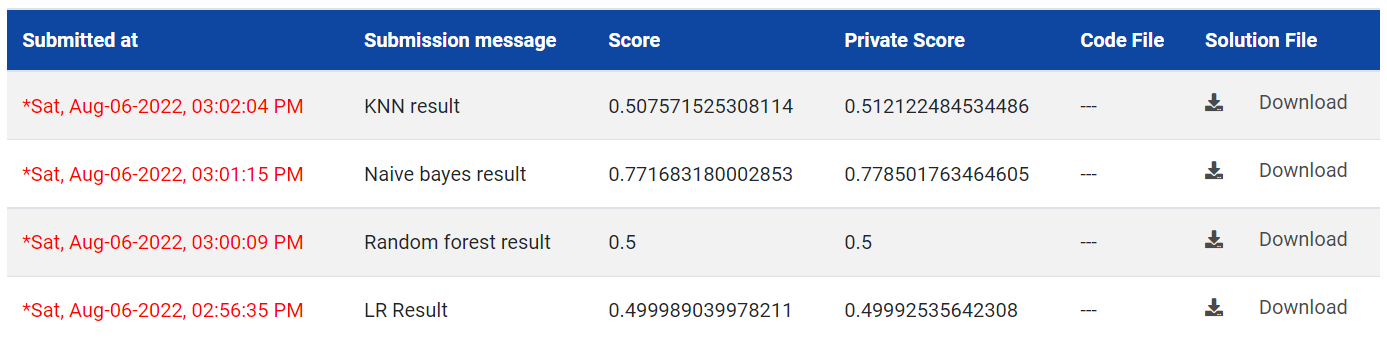

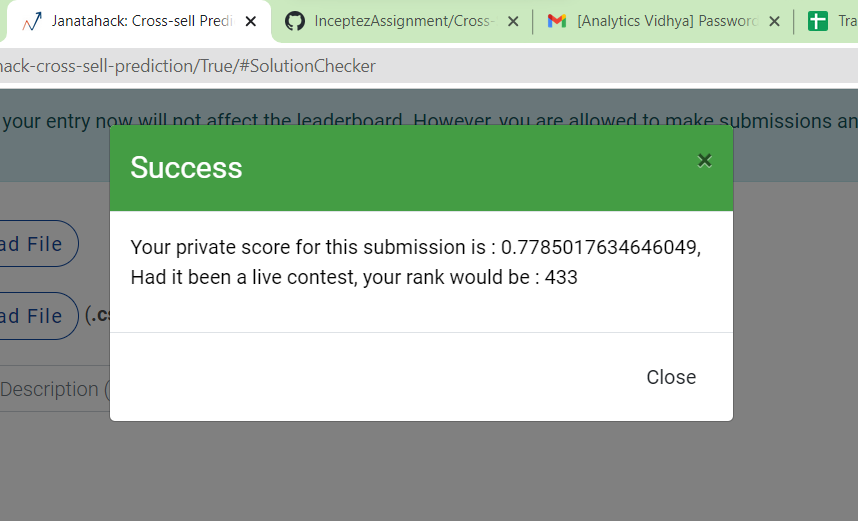

### Just coded the below logic to check all the algorithms accuracy score using common logic. 

In [272]:
def run_model(model,train_X = train_X, train_y = train_y,test_X = test_X,test_y=test_y):
    print(model)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    print("Train_X Accuracy : ",accuracy_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test_X Accuracy : ",accuracy_score(test_y, test_pred))
    
    
    

In [277]:
models = [LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]

In [278]:
for i in models:
    run_model(i)

LogisticRegression()


C:\Users\kalya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train_X Accuracy :  0.8766657810926671
Test_X Accuracy :  0.878499645771562
GaussianNB()
Train_X Accuracy :  0.7187252982252441
Test_X Accuracy :  0.7163810973209834
KNeighborsClassifier()
Train_X Accuracy :  0.8923306011735496
Test_X Accuracy :  0.8596468211277584
DecisionTreeClassifier()
Train_X Accuracy :  0.999878643563025
Test_X Accuracy :  0.8232400094460917
RandomForestClassifier()
Train_X Accuracy :  0.9998622440445148
Test_X Accuracy :  0.8666789116003254
AdaBoostClassifier()
Train_X Accuracy :  0.8770167307887841
Test_X Accuracy :  0.8789588307837632


### Voting

In [279]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = AdaBoostClassifier()
model4 = GaussianNB()
voting = VotingClassifier(estimators=[
         ('lr', model1), ('rf', model2), ('ada', model3), ('nb',model4)],
         voting='hard')

In [280]:
run_model(voting)

VotingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('nb', GaussianNB())])
Train_X Accuracy :  0.9809306398764133
Test_X Accuracy :  0.8720972947442995


### Stacking

In [284]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = AdaBoostClassifier()
model4 = GaussianNB()
lr = LogisticRegression()

estimators = [
     ('dt', model1),
     ('rf', model2),
     ('ada', model3)]

stack = StackingClassifier(estimators=estimators, final_estimator=lr)

print(run_model(stack))
stack.fit(train_X,train_y)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())
Train_X Accuracy :  0.953527044445975
Test_X Accuracy :  0.877463199601165
None


StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier())],
                   final_estimator=LogisticRegression())